In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import re

import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds

## Loading Dataset

In [3]:
data = pd.read_csv("/content/drive/MyDrive/Major project/transformer_dataset/final_train.csv", encoding = 'utf-8')




In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206259 entries, 0 to 206258
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   Messege  206236 non-null  object
 1   Reply    206222 non-null  object
dtypes: object(2)
memory usage: 3.1+ MB


In [5]:
data.head(10)

,Messege,Reply
0,i remember going to see the fireworks with my ...,Was this a friend you were in love with_comma_...
1,was this a friend you were in love with comma ...,This was a best friend. I miss her.
2,this was a best friend . i miss her .,Where has she gone?
3,where has she gone ?,We no longer talk.
4,we no longer talk .,Oh was this something that happened because of...
5,it feels like hitting to blank wall when i see...,Oh ya? I don't really see how
6,oh ya ? i do not really see how,dont you feel so.. its a wonder
7,dont you feel so . . its a wonder,I do actually hit blank walls a lot of times b...
8,i do actually hit blank walls a lot of times b...,i virtually thought so.. and i used to get sw...
9,i virtually thought so . . and i used to get s...,Wait what are sweatings


## Grouping Emotions

In [6]:
import re
def preprocess_sentence(sentence):
  sentence = sentence.lower().strip()
  # creating a space between a word and the punctuation following it
  # eg: "he is a boy." => "he is a boy ."
  sentence = re.sub(r"([?.!,])", r" \1 ", sentence)
  sentence = re.sub(r'[" "]+', " ", sentence)
  # removing contractions
  sentence = re.sub(r"i'm", "i am", sentence)
  sentence = re.sub(r"he's", "he is", sentence)
  sentence = re.sub(r"she's", "she is", sentence)
  sentence = re.sub(r"it's", "it is", sentence)
  sentence = re.sub(r"that's", "that is", sentence)
  sentence = re.sub(r"what's", "that is", sentence)
  sentence = re.sub(r"where's", "where is", sentence)
  sentence = re.sub(r"how's", "how is", sentence)
  sentence = re.sub(r"\'ll", " will", sentence)
  sentence = re.sub(r"\'ve", " have", sentence)
  sentence = re.sub(r"\'re", " are", sentence)
  sentence = re.sub(r"\'d", " would", sentence)
  sentence = re.sub(r"\'re", " are", sentence)
  sentence = re.sub(r"won't", "will not", sentence)
  sentence = re.sub(r"can't", "cannot", sentence)
  sentence = re.sub(r"n't", " not", sentence)
  sentence = re.sub(r"n'", "ng", sentence)
  sentence = re.sub(r"'bout", "about", sentence)
  # replacing everything with space except (a-z, A-Z, ".", "?", "!", ",")
  sentence = re.sub(r"[^a-zA-Z?.!,0-9 %]+", " ", sentence)
  sentence = sentence.strip()
  return sentence

In [7]:
questions = []
for i in data.Messege:
  i = str(i)
  i = preprocess_sentence(i)
  questions.append(i)

In [8]:
questions


['i remember going to see the fireworks with my best friend . it was the first time we ever spent time alone together . although there was a lot of people comma we felt like the only people in the world .',
 'was this a friend you were in love with comma or just a best friend ?',
 'this was a best friend . i miss her .',
 'where has she gone ?',
 'we no longer talk .',
 'it feels like hitting to blank wall when i see the darkness',
 'oh ya ? i do not really see how',
 'dont you feel so . . its a wonder',
 'i do actually hit blank walls a lot of times but i get by',
 'i virtually thought so . . and i used to get sweatings',
 'hi how are you doing today',
 'doing good . . how about you',
 'im good comma trying to understand how someone can feel like hitting a blank wall when they see the darkness',
 'it is quite strange that you didnt imagine it',
 'i have never cheated on my wife .',
 'and thats something you should never do comma good on you .',
 'yea it has not been easy but i am prou

In [9]:
answers = []
for i in data.Reply:
  i = str(i)
  #strings = i[(i.find("'answer'")) + 11:i.find("}")-1]
  strings = preprocess_sentence(i)
  answers.append(i)

In [10]:
from tensorflow.keras.models import load_model
emotions=[]
emotion_model = load_model('/content/drive/MyDrive/Major project/models/e_model/emotion_recognition.h5')

In [11]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from transformers import BertTokenizer

tokenizer = tf.keras.preprocessing.text.Tokenizer(filters='', oov_token='<OOV>')



def tokenize_and_preprocess(sentences, tokenizer, max_len=None):
    tokenizer.fit_on_texts(sentences)
    tokenized_sequences = tokenizer.texts_to_sequences(sentences)
    padded_sequences = pad_sequences(tokenized_sequences, maxlen=max_len)#, padding='pre', truncating='post')
    return padded_sequences

In [ ]:
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Assuming tokenize_and_preprocess is defined elsewhere
# Define questions, tokenizer, and emotion_model appropriately

e_max_length = 66
print(e_max_length)
emotion_labels = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad']
label_encoder2 = LabelEncoder()
label_encoder2.fit(emotion_labels)

# Make predictions
e_processed_sentences = tokenize_and_preprocess(questions, tokenizer, max_len=e_max_length)
print(e_processed_sentences.shape)
print(e_processed_sentences)
e_predictions = emotion_model.predict(e_processed_sentences)

# Print the predictions
emotions = []  # Define emotions list
for sentence, prediction in zip(questions, e_predictions):
    print(f"Sentence: {sentence}")
    print(f"Predicted probabilities: {prediction}")
    # You can extract the predicted emotion label based on the highest probability
    predicted_emotion_index = np.argmax(prediction)
    if predicted_emotion_index < len(emotion_labels):
        predicted_emotion = emotion_labels[predicted_emotion_index]
        print(f"Predicted emotion: {predicted_emotion}\n")
        emotions.append(predicted_emotion)
    else:
        print("Error: Predicted emotion index out of range.")

66


In [ ]:
print(len(emotions))
print(len(questions))
print(len(answers))

In [ ]:
# Build tokenizer using tfds for both questions and answers
tokenizer = tfds.deprecated.text.SubwordTextEncoder.build_from_corpus(
    questions + answers + emotions , target_vocab_size=2**13)
tokenizer.save_to_file('tokenizer.tf')
# Define start and end token to indicate the start and end of a sentence
START_TOKEN, END_TOKEN = [tokenizer.vocab_size], [tokenizer.vocab_size + 1]

# Vocabulary size plus start and end token
VOCAB_SIZE = tokenizer.vocab_size + 2

In [ ]:
tokenizer


<SubwordTextEncoder vocab_size=3661>

In [ ]:
END_TOKEN

[3662]

In [ ]:
VOCAB_SIZE

3663

In [ ]:
print('Tokenized sample question: {}'.format(tokenizer.encode(questions[20])))

Tokenized sample question: [133, 25, 151, 6, 319, 1187, 12, 72, 47, 343, 7]


In [ ]:
# Maximum sentence length
MAX_LENGTH = 40


# Tokenize, filter and pad sentences
def tokenize_and_filter(inputs, outputs, context):
  tokenized_inputs, tokenized_outputs, tokenized_context = [], [], []

  for (sentence1, sentence2, emotion) in zip(inputs, outputs, context):
    # tokenize sentence
    sentence1 = START_TOKEN + tokenizer.encode(sentence1) + END_TOKEN
    sentence2 = START_TOKEN + tokenizer.encode(sentence2) + END_TOKEN
    emotion = tokenizer.encode(emotion)
    # check tokenized sentence max length
    if len(sentence1) <= MAX_LENGTH and len(sentence2) <= MAX_LENGTH:
      tokenized_inputs.append(sentence1)
      tokenized_outputs.append(sentence2)
      tokenized_context.append(emotion)

  # pad tokenized sentences
  tokenized_inputs = tf.keras.preprocessing.sequence.pad_sequences(
      tokenized_inputs, maxlen=MAX_LENGTH, padding='post')
  tokenized_outputs = tf.keras.preprocessing.sequence.pad_sequences(
      tokenized_outputs, maxlen=MAX_LENGTH, padding='post')

  return tokenized_inputs, tokenized_outputs, tokenized_context


questions, answers, context = tokenize_and_filter(questions, answers, emotions)

In [ ]:
context

[[88],
 [8],
 [46],
 [8],
 [46],
 [46],
 [46],
 [130],
 [8],
 [88],
 [8],
 [46],
 [46],
 [8],
 [8],
 [24],
 [8],
 [8],
 [8],
 [8],
 [46],
 [70],
 [24],
 [8],
 [46],
 [8],
 [8],
 [46],
 [8],
 [8],
 [8],
 [8],
 [130],
 [8],
 [46],
 [130],
 [8],
 [88],
 [130],
 [46],
 [70],
 [24],
 [8],
 [8],
 [8],
 [70],
 [8],
 [46],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [24],
 [70],
 [24],
 [46],
 [24],
 [130],
 [70],
 [88],
 [46],
 [8],
 [24],
 [8],
 [8],
 [8],
 [24],
 [8],
 [24],
 [24],
 [8],
 [24],
 [46],
 [8],
 [8],
 [8],
 [46],
 [8],
 [8],
 [8],
 [8],
 [24],
 [8],
 [8],
 [8],
 [8],
 [46],
 [8],
 [88],
 [8],
 [24],
 [8],
 [46],
 [88],
 [24],
 [46],
 [24],
 [24],
 [8],
 [24],
 [24],
 [24],
 [88],
 [46],
 [8],
 [8],
 [70],
 [70],
 [8],
 [24],
 [8],
 [46],
 [24],
 [8],
 [8],
 [8],
 [24],
 [70],
 [46],
 [8],
 [24],
 [8],
 [24],
 [24],
 [24],
 [24],
 [8],
 [8],
 [24],
 [8],
 [8],
 [8],
 [70],
 [130],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [8],
 [70],
 [8],
 [8],
 [88],
 [8],
 [24],
 [46],
 [130],
 [24

In [ ]:
print('Vocab size: {}'.format(VOCAB_SIZE))
print('Number of samples: {}'.format(len(questions)))

Vocab size: 3663
Number of samples: 948


### Create `tf.data.Dataset`

In [ ]:
BATCH_SIZE = 64
BUFFER_SIZE = 20000

# decoder inputs use the previous target as input
# remove START_TOKEN from targets
dataset = tf.data.Dataset.from_tensor_slices((
    {
        'input1': questions,
        'input2': context,
        'dec_inputs': answers[:, :-1]
    },
    {
        'outputs': answers[:, 1:]
    },
))
tf.data.experimental.save(dataset, '/content/drive/MyDrive/Major project/transformer_dataset/Emotion-Aware-Transformer-Encoder-for-Empathetic-Dialogue-Generation')
dataset = dataset.cache()
dataset = dataset.shuffle(BUFFER_SIZE)
dataset = dataset.batch(BATCH_SIZE)
dataset = dataset.prefetch(tf.data.experimental.AUTOTUNE)

In [ ]:
len(questions)

948

In [ ]:
print(dataset)

<_PrefetchDataset element_spec=({'input1': TensorSpec(shape=(None, 40), dtype=tf.int32, name=None), 'input2': TensorSpec(shape=(None, 1), dtype=tf.int32, name=None), 'dec_inputs': TensorSpec(shape=(None, 39), dtype=tf.int32, name=None)}, {'outputs': TensorSpec(shape=(None, 39), dtype=tf.int32, name=None)})>


## Attention



In [ ]:
def scaled_dot_product_attention(query, key, value, mask):
  """Calculate the attention weights. """
  matmul_qk = tf.matmul(query, key, transpose_b=True)

  # scale matmul_qk
  depth = tf.cast(tf.shape(key)[-1], tf.float32)
  logits = matmul_qk / tf.math.sqrt(depth)

  # add the mask to zero out padding tokens
  if mask is not None:
    logits += (mask * -1e9)

  # softmax is normalized on the last axis (seq_len_k)
  attention_weights = tf.nn.softmax(logits, axis=-1)

  output = tf.matmul(attention_weights, value)

  return output

### Multi-head attention


In [ ]:
class MultiHeadAttention(tf.keras.layers.Layer):

  def __init__(self, d_model, num_heads, name="multi_head_attention"):
    super(MultiHeadAttention, self).__init__(name=name)
    self.num_heads = num_heads
    self.d_model = d_model

    assert d_model % self.num_heads == 0

    self.depth = d_model // self.num_heads

    self.query_dense = tf.keras.layers.Dense(units=d_model)
    self.key_dense = tf.keras.layers.Dense(units=d_model)
    self.value_dense = tf.keras.layers.Dense(units=d_model)

    self.dense = tf.keras.layers.Dense(units=d_model)

  def split_heads(self, inputs, batch_size):
    inputs = tf.reshape(
        inputs, shape=(batch_size, -1, self.num_heads, self.depth))
    return tf.transpose(inputs, perm=[0, 2, 1, 3])

  def call(self, inputs):
    query, key, value, mask = inputs['query'], inputs['key'], inputs[
        'value'], inputs['mask']
    batch_size = tf.shape(query)[0]

    # linear layers
    query = self.query_dense(query)
    key = self.key_dense(key)
    value = self.value_dense(value)

    # split heads
    query = self.split_heads(query, batch_size)
    key = self.split_heads(key, batch_size)
    value = self.split_heads(value, batch_size)

    # scaled dot-product attention
    scaled_attention = scaled_dot_product_attention(query, key, value, mask)

    scaled_attention = tf.transpose(scaled_attention, perm=[0, 2, 1, 3])

    # concatenation of heads
    concat_attention = tf.reshape(scaled_attention,
                                  (batch_size, -1, self.d_model))

    # final linear layer
    outputs = self.dense(concat_attention)

    return outputs

## Transformer

### Masking



In [ ]:
def create_padding_mask(x):
  mask = tf.cast(tf.math.equal(x, 0), tf.float32)
  # (batch_size, 1, 1, sequence length)
  return mask[:, tf.newaxis, tf.newaxis, :]

In [ ]:
print(create_padding_mask(tf.constant([[1, 2, 0, 3, 0], [0, 0, 0, 4, 5]])))

tf.Tensor(
[[[[0. 0. 1. 0. 1.]]]


 [[[1. 1. 1. 0. 0.]]]], shape=(2, 1, 1, 5), dtype=float32)


Look-ahead mask to mask the future tokens in a sequence.
We also mask out pad tokens.

i.e. To predict the third word, only the first and second word will be used

In [ ]:
def create_look_ahead_mask(x):
  seq_len = tf.shape(x)[1]
  look_ahead_mask = 1 - tf.linalg.band_part(tf.ones((seq_len, seq_len)), -1, 0)
  padding_mask = create_padding_mask(x)
  return tf.maximum(look_ahead_mask, padding_mask)

In [ ]:
print(create_look_ahead_mask(tf.constant([[1, 2, 0, 4, 5]])))

tf.Tensor(
[[[[0. 1. 1. 1. 1.]
   [0. 0. 1. 1. 1.]
   [0. 0. 1. 1. 1.]
   [0. 0. 1. 0. 1.]
   [0. 0. 1. 0. 0.]]]], shape=(1, 1, 5, 5), dtype=float32)


### Positional encoding


In [ ]:
class PositionalEncoding(tf.keras.layers.Layer):

  def __init__(self, position, d_model):
    super(PositionalEncoding, self).__init__()
    self.pos_encoding = self.positional_encoding(position, d_model)

  def get_angles(self, position, i, d_model):
    angles = 1 / tf.pow(10000, (2 * (i // 2)) / tf.cast(d_model, tf.float32))
    return position * angles

  def positional_encoding(self, position, d_model):
    angle_rads = self.get_angles(
        position=tf.range(position, dtype=tf.float32)[:, tf.newaxis],
        i=tf.range(d_model, dtype=tf.float32)[tf.newaxis, :],
        d_model=d_model)
    # apply sin to even index in the array
    sines = tf.math.sin(angle_rads[:, 0::2])
    # apply cos to odd index in the array
    cosines = tf.math.cos(angle_rads[:, 1::2])

    pos_encoding = tf.concat([sines, cosines], axis=-1)
    pos_encoding = pos_encoding[tf.newaxis, ...]
    return tf.cast(pos_encoding, tf.float32)

  def call(self, inputs):
    return inputs + self.pos_encoding[:, :tf.shape(inputs)[1], :]

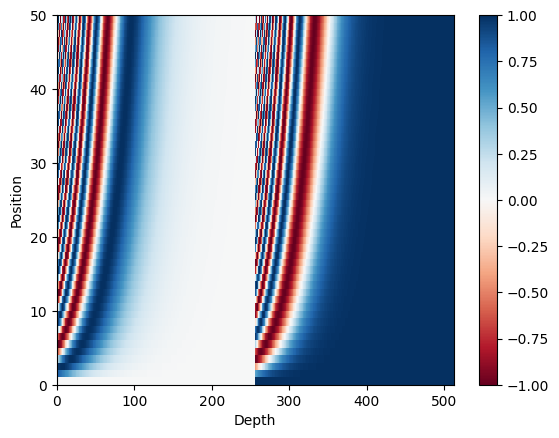

In [ ]:
sample_pos_encoding = PositionalEncoding(50, 512)

plt.pcolormesh(sample_pos_encoding.pos_encoding.numpy()[0], cmap='RdBu')
plt.xlabel('Depth')
plt.xlim((0, 512))
plt.ylabel('Position')
plt.colorbar()
plt.show()

### Encoder Layer


In [ ]:
def encoder_layer(units, d_model, num_heads, dropout, name="encoder_layer"):
  inputs = tf.keras.Input(shape=(None, d_model), name="inputs")
  padding_mask = tf.keras.Input(shape=(1, 1, None), name="padding_mask")

  attention = MultiHeadAttention(
      d_model, num_heads, name="attention")({
          'query': inputs,
          'key': inputs,
          'value': inputs,
          'mask': padding_mask
      })
  attention = tf.keras.layers.Dropout(rate=dropout)(attention)
  attention = tf.keras.layers.LayerNormalization(
      epsilon=1e-6)(inputs + attention)

  outputs = tf.keras.layers.Dense(units=units, activation='relu')(attention)
  outputs = tf.keras.layers.Dense(units=d_model)(outputs)
  outputs = tf.keras.layers.Dropout(rate=dropout)(outputs)
  outputs = tf.keras.layers.LayerNormalization(
      epsilon=1e-6)(attention + outputs)

  return tf.keras.Model(
      inputs=[inputs, padding_mask], outputs=outputs, name=name)

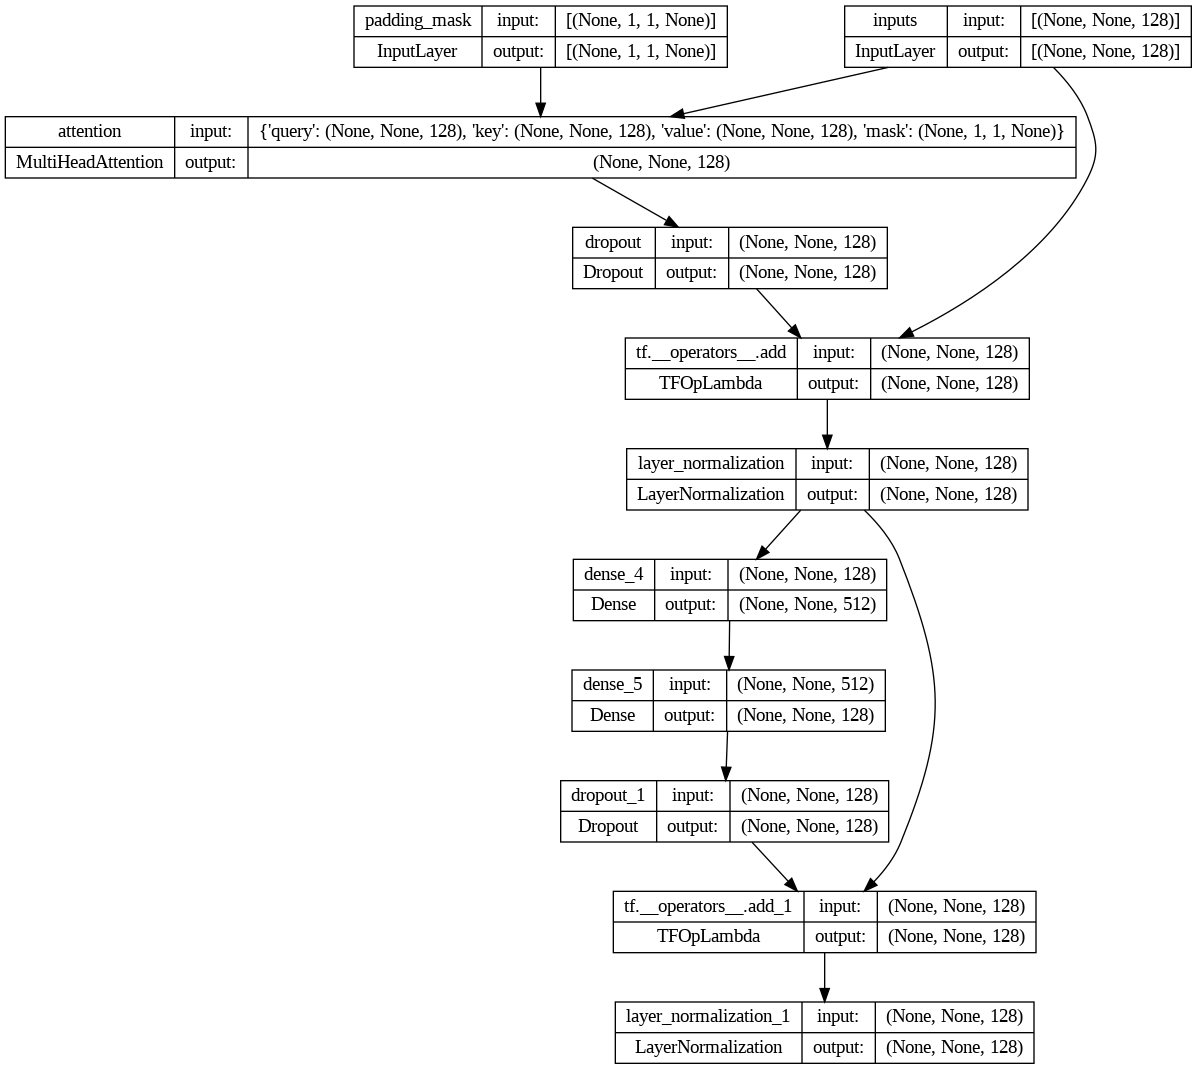

In [ ]:
sample_encoder_layer = encoder_layer(
    units=512,
    d_model=128,
    num_heads=4,
    dropout=0.3,
    name="sample_encoder_layer")

tf.keras.utils.plot_model(
    sample_encoder_layer, to_file='encoder_layer.png', show_shapes=True)

### Encoder

In [ ]:
def encoder(vocab_size,
            num_layers,
            units,
            d_model,
            num_heads,
            dropout,
            name="encoder"):
  input1 = tf.keras.Input(shape=(None,), name="input1")
  input2 = tf.keras.Input(shape=(None,), name="imput2")
  padding_mask = tf.keras.Input(shape=(1, 1, None), name="padding_mask")

  embedding1 = tf.keras.layers.Embedding(vocab_size, d_model)(input1)
  embedding1 *= tf.math.sqrt(tf.cast(d_model, tf.float32))

  embedding2 = tf.keras.layers.Embedding(vocab_size, d_model)(input2)
  embedding2 *= tf.math.sqrt(tf.cast(d_model, tf.float32))

  embeddings = outputs = tf.keras.layers.LayerNormalization(
      epsilon=1e-6)(embedding1 + embedding2)

  embeddings = PositionalEncoding(vocab_size, d_model)(embeddings)

  outputs = tf.keras.layers.Dropout(rate=dropout)(embeddings)

  for i in range(num_layers):
    outputs = encoder_layer(
        units=units,
        d_model=d_model,
        num_heads=num_heads,
        dropout=dropout,
        name="encoder_layer_{}".format(i),
    )([outputs, padding_mask])

  return tf.keras.Model(
      inputs=[input1,input2, padding_mask], outputs=outputs, name=name)

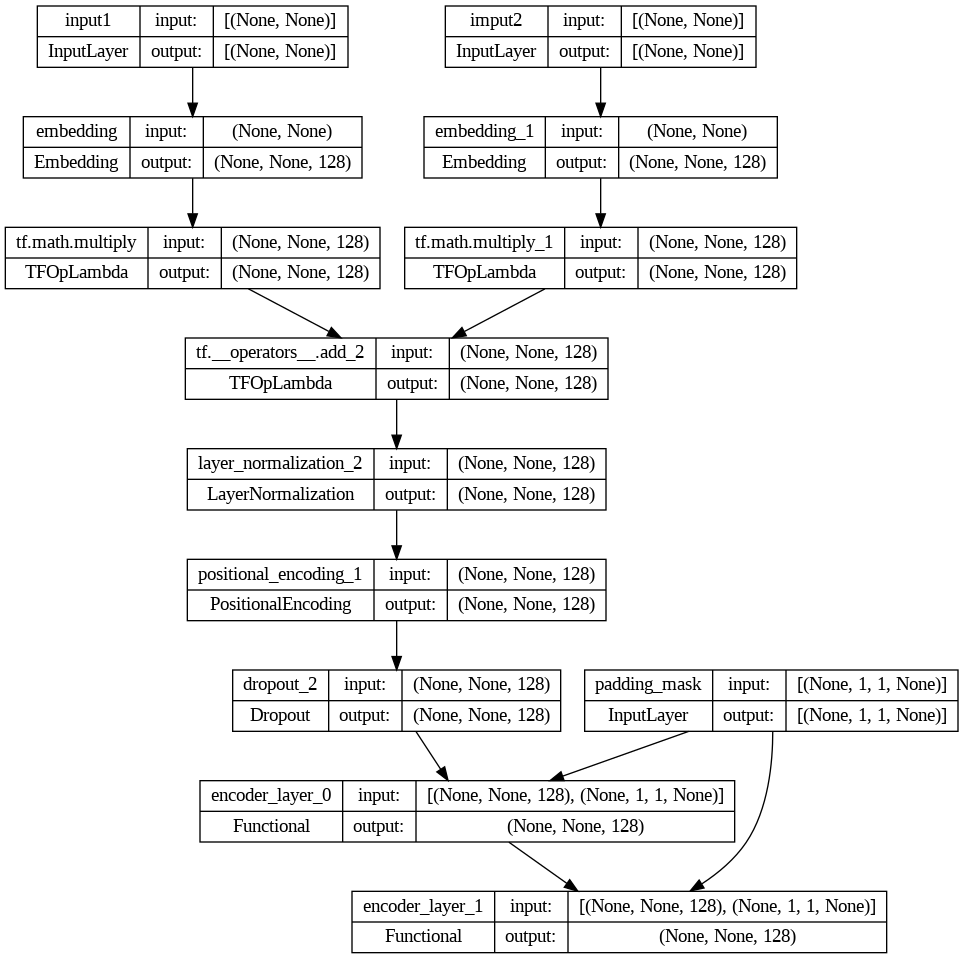

In [ ]:
sample_encoder = encoder(
    vocab_size=8192,
    num_layers=2,
    units=512,
    d_model=128,
    num_heads=4,
    dropout=0.3,
    name="sample_encoder")

tf.keras.utils.plot_model(
   sample_encoder, to_file='encoder.png', show_shapes=True)

### Decoder Layer


In [ ]:
def decoder_layer(units, d_model, num_heads, dropout, name="decoder_layer"):
  inputs = tf.keras.Input(shape=(None, d_model), name="inputs")
  enc_outputs = tf.keras.Input(shape=(None, d_model), name="encoder_outputs")
  look_ahead_mask = tf.keras.Input(shape=(1, None, None), name="look_ahead_mask")
  padding_mask = tf.keras.Input(shape=(1, 1, None), name='padding_mask')

  attention1 = MultiHeadAttention(
      d_model, num_heads, name="attention_1")(inputs={
          'query': inputs,
          'key': inputs,
          'value': inputs,
          'mask': look_ahead_mask
      })
  attention1 = tf.keras.layers.LayerNormalization(
      epsilon=1e-6)(attention1 + inputs)

  attention2 = MultiHeadAttention(
      d_model, num_heads, name="attention_2")(inputs={
          'query': attention1,
          'key': enc_outputs,
          'value': enc_outputs,
          'mask': padding_mask
      })
  attention2 = tf.keras.layers.Dropout(rate=dropout)(attention2)
  attention2 = tf.keras.layers.LayerNormalization(epsilon=1e-6)(attention2 + attention1)

  outputs = tf.keras.layers.Dense(units=units, activation='relu')(attention2)
  outputs = tf.keras.layers.Dense(units=d_model)(outputs)
  outputs = tf.keras.layers.Dropout(rate=dropout)(outputs)
  outputs = tf.keras.layers.LayerNormalization(epsilon=1e-6)(outputs + attention2)

  return tf.keras.Model(
      inputs=[inputs, enc_outputs, look_ahead_mask, padding_mask],
      outputs=outputs,
      name=name)

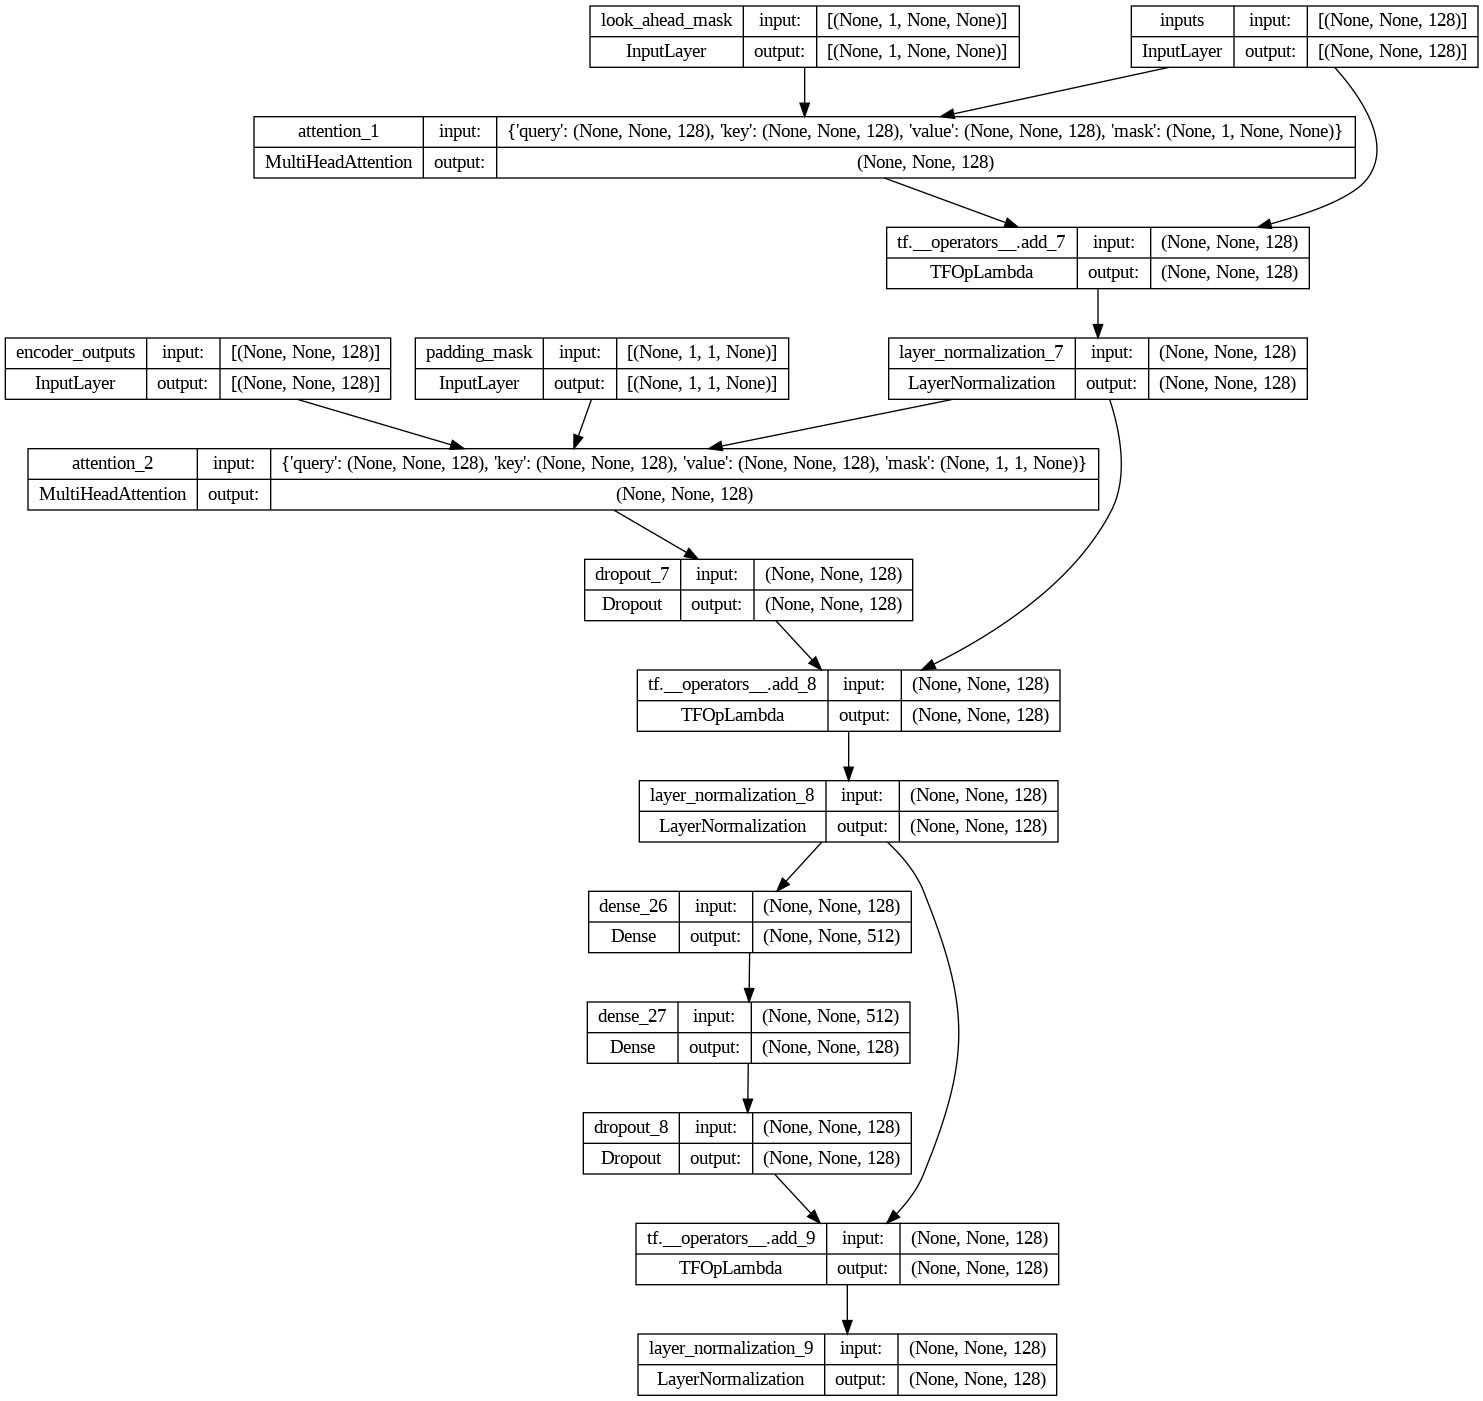

In [ ]:
sample_decoder_layer = decoder_layer(
    units=512,
    d_model=128,
    num_heads=4,
    dropout=0.3,
    name="sample_decoder_layer")

tf.keras.utils.plot_model(
    sample_decoder_layer, to_file='decoder_layer.png', show_shapes=True)

### Decoder


In [ ]:
def decoder(vocab_size,
            num_layers,
            units,
            d_model,
            num_heads,
            dropout,
            name='decoder'):
  inputs = tf.keras.Input(shape=(None,), name='inputs')
  enc_outputs = tf.keras.Input(shape=(None, d_model), name='encoder_outputs')
  look_ahead_mask = tf.keras.Input(
      shape=(1, None, None), name='look_ahead_mask')
  padding_mask = tf.keras.Input(shape=(1, 1, None), name='padding_mask')

  embeddings = tf.keras.layers.Embedding(vocab_size, d_model)(inputs)
  embeddings *= tf.math.sqrt(tf.cast(d_model, tf.float32))
  embeddings = PositionalEncoding(vocab_size, d_model)(embeddings)

  outputs = tf.keras.layers.Dropout(rate=dropout)(embeddings)

  for i in range(num_layers):
    outputs = decoder_layer(
        units=units,
        d_model=d_model,
        num_heads=num_heads,
        dropout=dropout,
        name='decoder_layer_{}'.format(i),
    )(inputs=[outputs, enc_outputs, look_ahead_mask, padding_mask])

  return tf.keras.Model(
      inputs=[inputs, enc_outputs, look_ahead_mask, padding_mask],
      outputs=outputs,
      name=name)

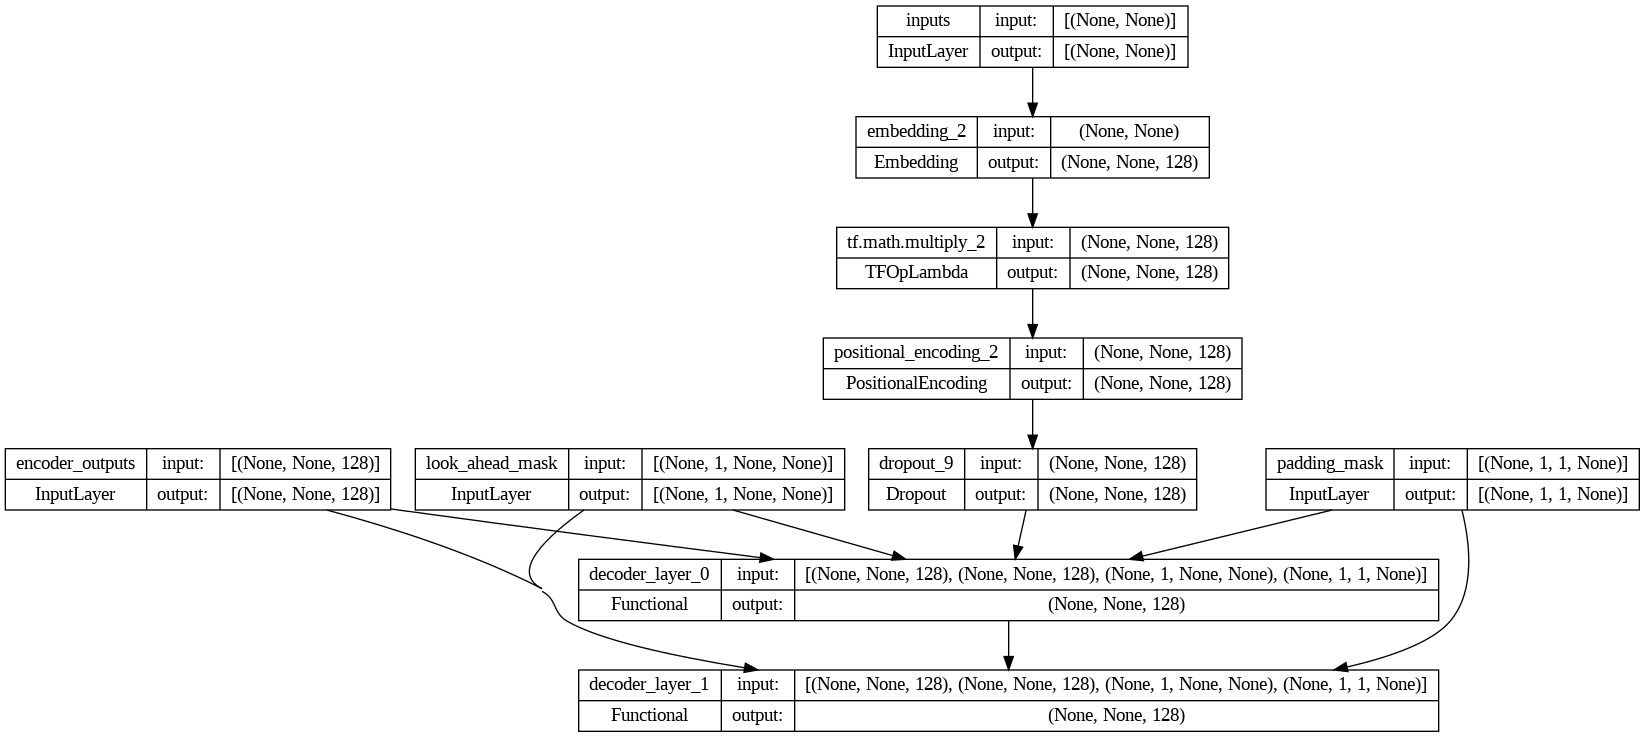

In [ ]:
sample_decoder = decoder(
    vocab_size=8192,
    num_layers=2,
    units=512,
    d_model=128,
    num_heads=4,
    dropout=0.3,
    name="sample_decoder")

tf.keras.utils.plot_model(
    sample_decoder, to_file='decoder.png', show_shapes=True)

### Transformer


In [ ]:
def transformer(vocab_size,
                num_layers,
                units,
                d_model,
                num_heads,
                dropout,
                name="transformer"):
  input1 = tf.keras.Input(shape=(None,), name="input1")
  input2 = tf.keras.Input(shape=(None,), name="input2")
  dec_inputs = tf.keras.Input(shape=(None,), name="dec_inputs")

  enc_padding_mask = tf.keras.layers.Lambda(
      create_padding_mask, output_shape=(1, 1, None),
      name='enc_padding_mask')(input1)
  # mask the future tokens for decoder inputs at the 1st attention block
  look_ahead_mask = tf.keras.layers.Lambda(
      create_look_ahead_mask,
      output_shape=(1, None, None),
      name='look_ahead_mask')(dec_inputs)
  # mask the encoder outputs for the 2nd attention block
  dec_padding_mask = tf.keras.layers.Lambda(
      create_padding_mask, output_shape=(1, 1, None),
      name='dec_padding_mask')(input1)

  enc_outputs = encoder(
      vocab_size=vocab_size,
      num_layers=num_layers,
      units=units,
      d_model=d_model,
      num_heads=num_heads,
      dropout=dropout,
  )(inputs=[input1, input2, enc_padding_mask])

  dec_outputs = decoder(
      vocab_size=vocab_size,
      num_layers=num_layers,
      units=units,
      d_model=d_model,
      num_heads=num_heads,
      dropout=dropout,
  )(inputs=[dec_inputs, enc_outputs, look_ahead_mask, dec_padding_mask])

  outputs = tf.keras.layers.Dense(units=vocab_size, name="outputs")(dec_outputs)

  return tf.keras.Model(inputs=[input1, input2, dec_inputs], outputs=outputs, name=name)

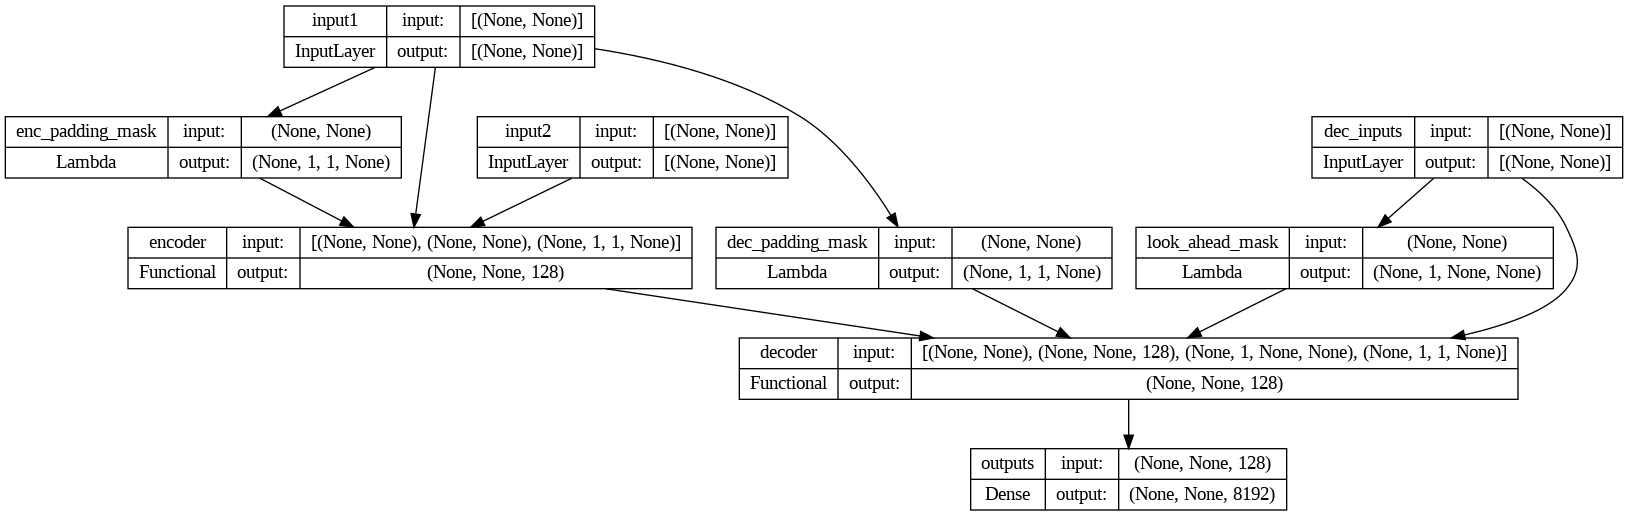

In [ ]:
sample_transformer = transformer(
    vocab_size=8192,
    num_layers=4,
    units=512,
    d_model=128,
    num_heads=4,
    dropout=0.3,
    name="sample_transformer")

tf.keras.utils.plot_model(
    sample_transformer, to_file='transformer.png', show_shapes=True)

## Train model

### Initialize model


In [ ]:
tf.keras.backend.clear_session()

# Hyper-parameters
NUM_LAYERS = 2
D_MODEL = 256
NUM_HEADS = 8
UNITS = 512
DROPOUT = 0.1

model = transformer(
    vocab_size=VOCAB_SIZE,
    num_layers=NUM_LAYERS,
    units=UNITS,
    d_model=D_MODEL,
    num_heads=NUM_HEADS,
    dropout=DROPOUT)

### Loss function


In [ ]:
def loss_function(y_true, y_pred):
  y_true = tf.reshape(y_true, shape=(-1, MAX_LENGTH - 1))

  loss = tf.keras.losses.SparseCategoricalCrossentropy(
      from_logits=True, reduction='none')(y_true, y_pred)

  mask = tf.cast(tf.not_equal(y_true, 0), tf.float32)
  loss = tf.multiply(loss, mask)

  return tf.reduce_mean(loss)

### Custom learning rate


In [ ]:
class CustomSchedule(tf.keras.optimizers.schedules.LearningRateSchedule):
    def __init__(self, d_model, warmup_steps=4000):
        super(CustomSchedule, self).__init__()
        self.d_model = tf.constant(d_model, dtype=tf.float32)
        self.warmup_steps = warmup_steps

    def get_config(self):
        return {"d_model": self.d_model.numpy(), "warmup_steps": self.warmup_steps}

    def __call__(self, step):
        arg1 = tf.math.rsqrt(tf.cast(step, tf.float32))
        arg2 = tf.cast(step, tf.float32) * (self.warmup_steps**-1.5)

        return tf.math.multiply(tf.math.rsqrt(self.d_model), tf.math.minimum(arg1, arg2))

Text(0.5, 0, 'Train Step')

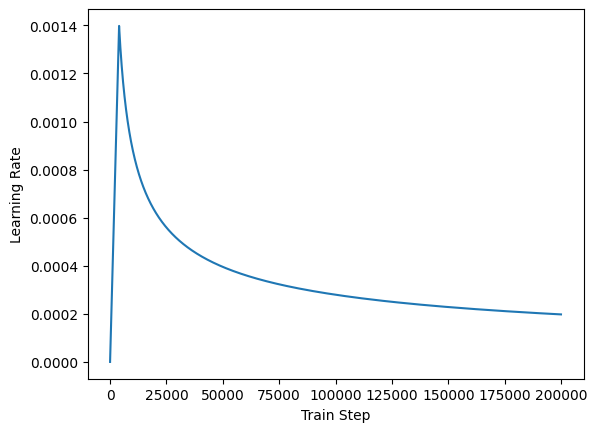

In [ ]:
sample_learning_rate = CustomSchedule(d_model=128)

plt.plot(sample_learning_rate(tf.range(200000, dtype=tf.float32)))
plt.ylabel("Learning Rate")
plt.xlabel("Train Step")

### Compile Model


In [ ]:
learning_rate = CustomSchedule(D_MODEL)

optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate, beta_1=0.9, beta_2=0.98, epsilon=1e-9)

def accuracy(y_true, y_pred):
    y_true = tf.reshape(y_true, shape=(-1, MAX_LENGTH - 1))
    return tf.keras.metrics.sparse_categorical_accuracy(y_true, y_pred)

from sklearn.model_selection import train_test_split

model.compile(optimizer=optimizer, loss=loss_function, metrics=['accuracy', 'val_accuracy', 'val_loss'])

### Fit model


In [ ]:
# Define your Transformer model class here
from tensorflow.keras.callbacks import Callback

class PerplexityCallback(Callback):
    def on_epoch_end(self, epoch, logs=None):
        perplexity = self.calculate_perplexity()
        print(f' - perplexity: {perplexity}')

    def calculate_perplexity(self):
        total_perplexity = 0
        num_batches = 0
        for x_batch, y_batch in train_data:
            logits = self.model(x_batch, training=False)  # Forward pass
            perplexity = self.calculate_batch_perplexity(logits, y_batch)  # Calculate perplexity
            total_perplexity += perplexity
            num_batches += 1
        average_perplexity = total_perplexity / num_batches
        return average_perplexity

    @staticmethod
    def calculate_batch_perplexity(logits, targets):
        cross_entropy = tf.keras.losses.sparse_categorical_crossentropy(targets, logits, from_logits=True)
        perplexity = tf.exp(tf.reduce_mean(cross_entropy))
        return perplexity.numpy()

In [ ]:
EPOCHS = 200
history1 = model.fit(dataset, epochs=EPOCHS)

Epoch 1/200
15/15 [==============================] - 1s 61ms/step - loss: 1.7136 - accuracy: 0.1220
Epoch 2/200
15/15 [==============================] - 1s 73ms/step - loss: 1.6737 - accuracy: 0.1259
Epoch 3/200
15/15 [==============================] - 1s 50ms/step - loss: 1.6349 - accuracy: 0.1297
Epoch 4/200
15/15 [==============================] - 1s 57ms/step - loss: 1.5980 - accuracy: 0.1330
Epoch 5/200
15/15 [==============================] - 1s 43ms/step - loss: 1.5616 - accuracy: 0.1374
Epoch 6/200
15/15 [==============================] - 1s 43ms/step - loss: 1.5295 - accuracy: 0.1397
Epoch 7/200
15/15 [==============================] - 1s 43ms/step - loss: 1.4924 - accuracy: 0.1443
Epoch 8/200
15/15 [==============================] - 1s 56ms/step - loss: 1.4572 - accuracy: 0.1487
Epoch 9/200
15/15 [==============================] - 1s 52ms/step - loss: 1.4229 - accuracy: 0.1516
Epoch 10/200
15/15 [==============================] - 1s 57ms/step - loss: 1.3903 - accuracy: 0.1563

In [ ]:
from keras.utils import plot_model

import matplotlib.pyplot as plt
%matplotlib inline

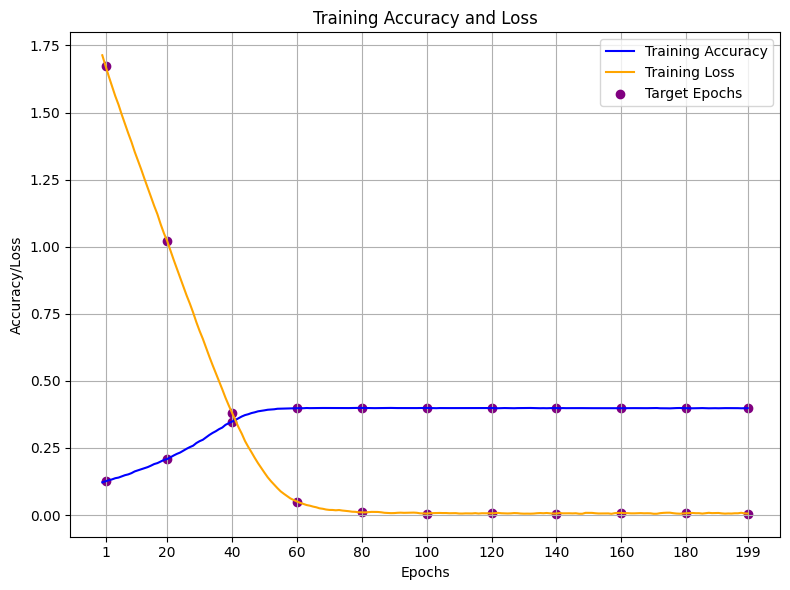

In [ ]:
import matplotlib.pyplot as plt

def plot_training_graph(history, target_epochs=[1, 20, 40, 60, 80, 100, 120, 140, 160, 180, 199]):
    acc = history.history['accuracy']
    loss = history.history['loss']

    epochs_range = range(len(loss))
    target_epochs_indices = [epochs_range.index(epoch) for epoch in target_epochs]

    plt.figure(figsize=(8, 6), dpi=100)

    plt.plot(epochs_range, acc, label='Training Accuracy', color='blue')
    plt.plot(epochs_range, loss, label='Training Loss', color='orange')

    # Highlight specific epochs with markers
    plt.scatter(target_epochs_indices, [acc[i] for i in target_epochs_indices], label='Target Epochs', marker='o', color='purple')
    plt.scatter(target_epochs_indices, [loss[i] for i in target_epochs_indices], marker='o', color='purple')

    plt.xlabel('Epochs')
    plt.ylabel('Accuracy/Loss')  # Combined label for clarity
    plt.title('Training Accuracy and Loss')
    plt.legend()

    plt.grid(True)
    plt.xticks(target_epochs_indices)  # Show only specified epochs on x-axis
    plt.tight_layout()
    plt.savefig("Training_graph_epoch_highlights.png")
    plt.show()

# Assuming you have `history1` containing the training data:
plot_training_graph(history1)


In [ ]:
EPOCHS = 2000
history2 = model.fit(dataset, epochs=EPOCHS)

Epoch 1/2000
15/15 [==============================] - 1s 49ms/step - loss: 0.0074 - accuracy: 0.3984
Epoch 2/2000
15/15 [==============================] - 1s 43ms/step - loss: 0.0059 - accuracy: 0.3985
Epoch 3/2000
15/15 [==============================] - 1s 43ms/step - loss: 0.0050 - accuracy: 0.3990
Epoch 4/2000
15/15 [==============================] - 1s 43ms/step - loss: 0.0052 - accuracy: 0.3987
Epoch 5/2000
15/15 [==============================] - 1s 63ms/step - loss: 0.0062 - accuracy: 0.3985
Epoch 6/2000
15/15 [==============================] - 1s 68ms/step - loss: 0.0066 - accuracy: 0.3984
Epoch 7/2000
15/15 [==============================] - 1s 49ms/step - loss: 0.0068 - accuracy: 0.3982
Epoch 8/2000
15/15 [==============================] - 1s 43ms/step - loss: 0.0062 - accuracy: 0.3987
Epoch 9/2000
15/15 [==============================] - 1s 42ms/step - loss: 0.0061 - accuracy: 0.3985
Epoch 10/2000
15/15 [==============================] - 1s 43ms/step - loss: 0.0067 - accura

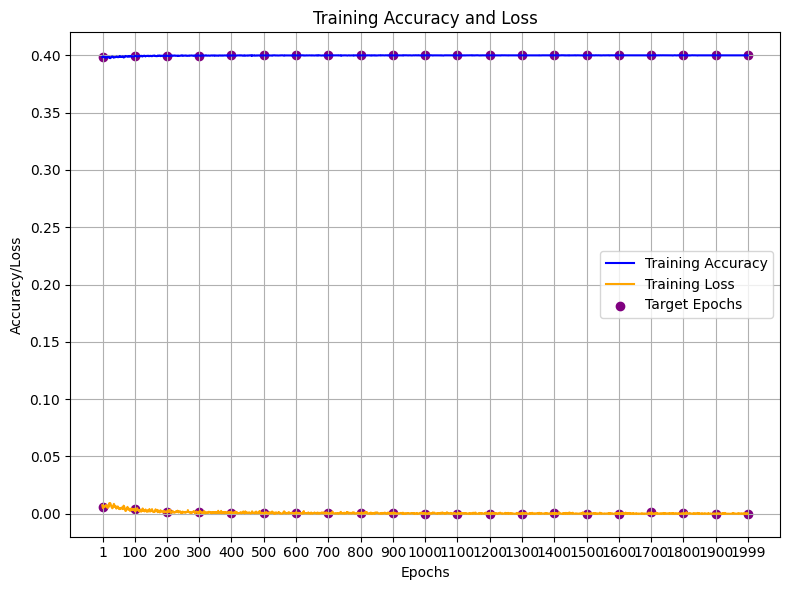

In [ ]:
import matplotlib.pyplot as plt

def plot_training_graph(history, target_epochs=[1, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000,
                                                1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 1999]):
    acc = history.history['accuracy']
    loss = history.history['loss']

    epochs_range = range(len(loss))
    target_epochs_indices = [epochs_range.index(epoch) for epoch in target_epochs]

    plt.figure(figsize=(8, 6), dpi=100)

    plt.plot(epochs_range, acc, label='Training Accuracy', color='blue')
    plt.plot(epochs_range, loss, label='Training Loss', color='orange')

    # Highlight specific epochs with markers
    plt.scatter(target_epochs_indices, [acc[i] for i in target_epochs_indices], label='Target Epochs', marker='o', color='purple')
    plt.scatter(target_epochs_indices, [loss[i] for i in target_epochs_indices], marker='o', color='purple')

    plt.xlabel('Epochs')
    plt.ylabel('Accuracy/Loss')  # Combined label for clarity
    plt.title('Training Accuracy and Loss')
    plt.legend()

    plt.grid(True)
    plt.xticks(target_epochs_indices)  # Show only specified epochs on x-axis
    plt.tight_layout()
    plt.savefig("Training_graph_epoch_highlights.png")
    plt.show()

# Assuming you have `history1` containing the training data:
plot_training_graph(history2)


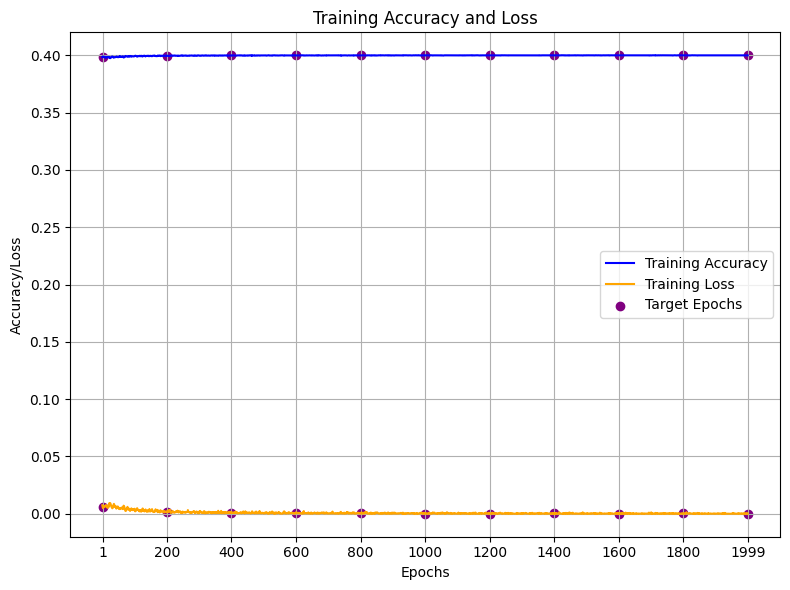

In [ ]:
import matplotlib.pyplot as plt

def plot_training_graph(history, target_epochs=[1, 200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 1999]):
    acc = history.history['accuracy']
    loss = history.history['loss']

    epochs_range = range(len(loss))
    target_epochs_indices = [epochs_range.index(epoch) for epoch in target_epochs]

    plt.figure(figsize=(8, 6), dpi=100)

    plt.plot(epochs_range, acc, label='Training Accuracy', color='blue')
    plt.plot(epochs_range, loss, label='Training Loss', color='orange')

    # Highlight specific epochs with markers
    plt.scatter(target_epochs_indices, [acc[i] for i in target_epochs_indices], label='Target Epochs', marker='o', color='purple')
    plt.scatter(target_epochs_indices, [loss[i] for i in target_epochs_indices], marker='o', color='purple')

    plt.xlabel('Epochs')
    plt.ylabel('Accuracy/Loss')  # Combined label for clarity
    plt.title('Training Accuracy and Loss')
    plt.legend()

    plt.grid(True)
    plt.xticks(target_epochs_indices)  # Show only specified epochs on x-axis
    plt.tight_layout()
    plt.savefig("Training_graph_epoch_highlights.png")
    plt.show()

# Assuming you have `history1` containing the training data:
plot_training_graph(history2)


# Save and load model

In [ ]:
model.save_weights('/content/drive/MyDrive/Major project/models/t_model/mymodel1.h5')

In [ ]:
def create_model():
    NUM_LAYERS = 2
    D_MODEL = 256
    NUM_HEADS = 8
    UNITS = 512
    DROPOUT = 0.1

    model = transformer(
    vocab_size=VOCAB_SIZE,
    num_layers=NUM_LAYERS,
    units=UNITS,
    d_model=D_MODEL,
    num_heads=NUM_HEADS,
    dropout=DROPOUT)
    model.compile(optimizer=optimizer, loss=loss_function, metrics=[accuracy])
    return model


In [ ]:
test=create_model()

In [ ]:
test

In [ ]:
test.load_weights('/content/drive/MyDrive/Major project/models/t_model/mymodel1.h5')

In [ ]:
def evaluate(sentence,emotion):
    sentence = preprocess_sentence(sentence)

    sentence = tf.expand_dims(
        START_TOKEN + tokenizer.encode(sentence) + END_TOKEN, axis=0

    )
    emotion = tokenizer.encode(emotion)

    output = tf.expand_dims(START_TOKEN, 0)

    for i in range(MAX_LENGTH):
        predictions = test(inputs=[sentence,emotion, output], training=False)

        # select the last word from the seq_len dimension
        predictions = predictions[:, -1:, :]
        predicted_id = tf.cast(tf.argmax(predictions, axis=-1), tf.int32)

        # return the result if the predicted_id is equal to the end token
        if tf.equal(predicted_id, END_TOKEN[0]):
            break

        # concatenated the predicted_id to the output which is given to the decoder
        # as its input.
        output = tf.concat([output, predicted_id], axis=-1)

    return tf.squeeze(output, axis=0)


def predict(sentence,emotion):
    prediction = evaluate(sentence,emotion)
    predicted_sentence = tokenizer.decode(
        [i for i in prediction if i < tokenizer.vocab_size]
    )
    sentence = re.sub(r"\\", "", predicted_sentence)
    sentence = re.sub(r"&", "", sentence)
    sentence = re.sub(r"comma", " Rahul", sentence)
    sentence = re.sub(r"undsc", "", sentence)
    return sentence

In [ ]:
predict("i am happy",'neutral')

'I bet! It has to feel like a huge accomplishment.'

In [ ]:
predict(" how are you doing?",'neutral')

"Got into a motorcycle accident and is now paraplegic. They're doing just fine! He's got his pride issues Rahul but she's sticking with him."